#### Project: Fashion MNIST dataset

#### Programmer: Ricardo A. Leal

#### Date: 09/23/2020

#### Skills practiced in this project: CNN with Sequential model, Dropout, Data Augmentation, classification report, Conv2D, Batch Normalization, MaxPooling

##### Note: 
Some of my features are processed in a similar way to what I have learn on different machine learning courses, books and websites. This is a basic project to get familiar with machine learning techniques.

In [ ]:
#Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#Extensions
%matplotlib inline

#Set seed to reproduce results
np.random.seed(33)
tf.random.set_seed(99)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Get data

In [ ]:
# Load data
fashion_mnist = tf.keras.datasets.fashion_mnist
#Split data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Explore data

In [ ]:
#Check data:

#Train set
print("X train: ", X_train.shape)
print("y train: ", y_train.shape)
#Test set
print("\nX test: ", X_test.shape)
print("y test: ", y_test.shape)

#Check data type
print("\nData type: ", type(X_train), X_train.dtype)

#Number of target classes
n_classes = len(np.unique(y_train))
print("\nNumber of target classes: ", n_classes)

#Target labels
target_labels =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("\nTarget labels:", target_labels)


X train:  (60000, 28, 28)
y train:  (60000,)

X test:  (10000, 28, 28)
y test:  (10000,)

Data type:  <class 'numpy.ndarray'> uint8

Number of target classes:  10

Target labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


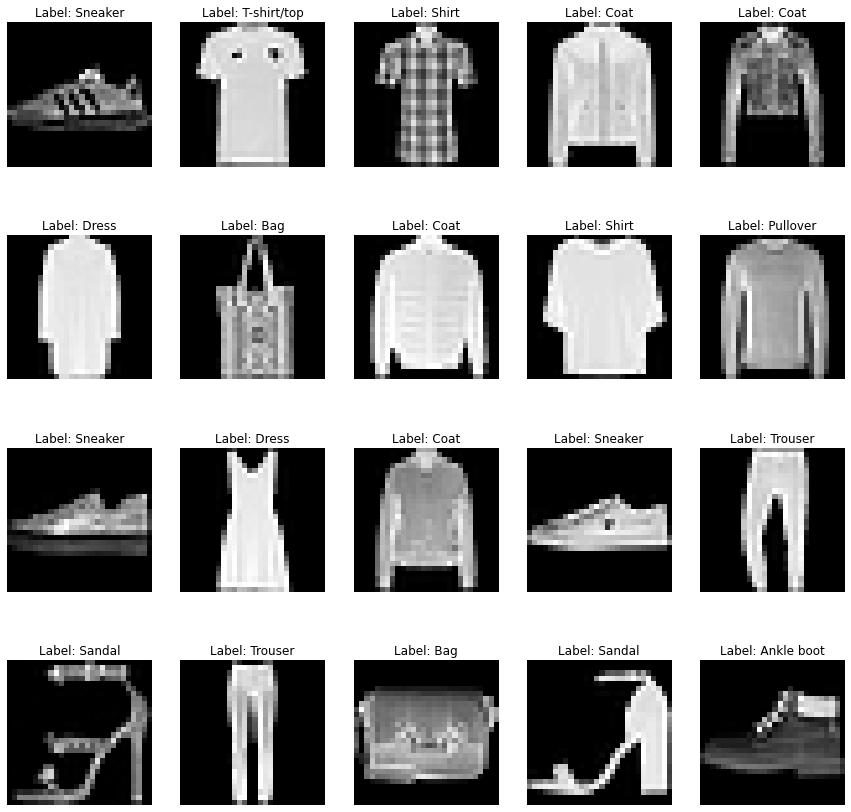

In [ ]:
#Display some samples and their labels

rows = 4
columns = 5

fig, axes = plt.subplots(rows, columns, figsize=(15,15))
axes = axes.ravel()

random_indexes = np.random.randint(low = 0, high = y_train.shape[0], size = rows*columns)

for index in range(0, rows*columns):
  axes[index].axis('off')
  axes[index].imshow(X_train[random_indexes[index]], cmap = 'gray')
  axes[index].set_title("Label: {}".format(target_labels[int(y_train[random_indexes[index]])]))

In [ ]:
#Reshape the data to (N, 28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

#Input shape
input_shape = X_train.shape[1:]
print("\nInput shape: ", input_shape)


Input shape:  (28, 28, 1)


In [ ]:
#Scale data
X_train = X_train / 255.0
X_test =  X_test / 255.0

#Transform data type to float32
X_train = np.float32(X_train)
X_test = np.float32(X_test)

#Train test split to produce X val and y val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 13, stratify = y_train)

## CNN model

In [ ]:
#Sequential model
cnn_model = tf.keras.models.Sequential([
                                               
      #Convolution 1                                         
      tf.keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), activation = 'relu', 
                             padding = 'same', input_shape = input_shape),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D((2,2)),

      #Convolution 2
      tf.keras.layers.Conv2D(filters = 100, kernel_size = (3,3), strides = (1,1), activation = 'relu', 
                             padding = 'same'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D((2,2)),

      #Convolution 3
      tf.keras.layers.Conv2D(filters = 200, kernel_size = (3,3), strides = (1,1), activation = 'relu', 
                             padding = 'same'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D((2,2)),

      #Flatten and Dense
      tf.keras.layers.Flatten(),      
      tf.keras.layers.Dense(400, activation = 'relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(100, activation = 'relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(n_classes, activation = 'softmax')                                         
])

In [ ]:
#Compile model
cnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train models

In [ ]:
#Variables for training
batch_size = 32
epochs = 15

#Early stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 4)

In [ ]:
'''
Function "get_augmented_data": 
Generates data using ImageDataGenerator
Parameter: X dataset, y dataset, any keyword paramater that can be inputted in tf.keras.preprocessing.image.ImageDataGenerator
Returns the augmented data
'''
def get_augmented_data(X, y, **kwargs):
  image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(kwargs)
  return image_data_generator.flow(X, y)

### Train CNN Model

In [ ]:
#Train model
history = cnn_model.fit(x = X_train, y = y_train, batch_size = batch_size, validation_data = (X_val, y_val),
                               epochs = epochs, callbacks = [early_stop])

Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4954 - accuracy: 0.8246 - val_loss: 0.3526 - val_accuracy: 0.8763
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3166 - accuracy: 0.8863 - val_loss: 0.2814 - val_accuracy: 0.8981
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2753 - accuracy: 0.9007 - val_loss: 0.3209 - val_accuracy: 0.8824
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2456 - accuracy: 0.9126 - val_loss: 0.2646 - val_accuracy: 0.9036
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2207 - accuracy: 0.9224 - val_loss: 0.2612 - val_accuracy: 0.9095
Epoch 6/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2026 - accuracy: 0.9279 - val_loss: 0.3844 - val_accuracy: 0.8840
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1819 - accuracy: 0.9346 - val_loss: 0.2880 - val_accuracy:

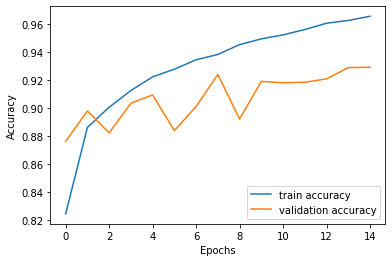

In [ ]:
#Plot accuracy
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(loc = 'lower right')

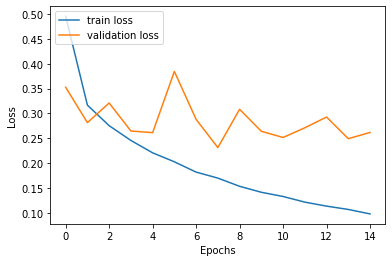

In [ ]:
#Plot loss
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(loc = 'upper left')

#### Data Augmentation

In [ ]:
#Get augmented data
augmented_data = get_augmented_data(X_train, y_train, shear_range = 0.2, brightness_range=[0.15, 1.0])

#Fit augmented data
history = cnn_model.fit(augmented_data, validation_data = (X_val, y_val), steps_per_epoch = (X_train.shape[0]//batch_size),
                    validation_steps = (X_val.shape[0]//batch_size), epochs = epochs, batch_size = batch_size)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0954 - accuracy: 0.9671 - val_loss: 0.2832 - val_accuracy: 0.9269
Epoch 2/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0844 - accuracy: 0.9693 - val_loss: 0.3633 - val_accuracy: 0.9198
Epoch 3/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0797 - accuracy: 0.9726 - val_loss: 0.4107 - val_accuracy: 0.9211
Epoch 4/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0785 - accuracy: 0.9721 - val_loss: 0.3326 - val_accuracy: 0.9272
Epoch 5/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0764 - accuracy: 0.9743 - val_loss: 0.3890 - val_accuracy: 0.9256
Epoch 6/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0685 - accuracy: 0.9764 - val_loss: 0.4348 - val_accuracy: 0.9159
Epoch 7/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0698 - accuracy: 0.9755 - val_loss: 0.4200 - val_accuracy:

In [ ]:
#Get augmented data
augmented_data = get_augmented_data(X_train, y_train, zoom_range = 0.2)

#Fit augmented data
history = cnn_model.fit(augmented_data, validation_data = (X_val, y_val), steps_per_epoch = (X_train.shape[0]//batch_size),
                    validation_steps = (X_val.shape[0]//batch_size), epochs = epochs, batch_size = batch_size)

Epoch 1/15
  34/1500 [..............................] - ETA: 6s - loss: 0.0226 - accuracy: 0.9917

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1500/1500 [==============================] - 8s 5ms/step - loss: 0.0470 - accuracy: 0.9849 - val_loss: 0.4263 - val_accuracy: 0.9284
Epoch 2/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0460 - accuracy: 0.9855 - val_loss: 0.4607 - val_accuracy: 0.9249
Epoch 3/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0384 - accuracy: 0.9870 - val_loss: 0.5058 - val_accuracy: 0.9251
Epoch 4/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0513 - accuracy: 0.9847 - val_loss: 0.4608 - val_accuracy: 0.9264
Epoch 5/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.4058 - val_accuracy: 0.9292
Epoch 6/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0431 - accuracy: 0.9861 - val_loss: 0.4698 - val_accuracy: 0.9112
Epoch 7/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0332 - accuracy: 0.9892 - val_loss: 0.7932 - val_accuracy: 0.9115
Epo

In [ ]:
#Get augmented data
augmented_data = get_augmented_data(X_train, y_train, width_shift_range=0.1, height_shift_range=0.1, 
                                                                 horizontal_flip=True)

#Fit augmented data
history = cnn_model.fit(augmented_data, validation_data = (X_val, y_val), steps_per_epoch = (X_train.shape[0]//batch_size),
                    validation_steps = (X_val.shape[0]//batch_size), epochs = epochs, batch_size = batch_size)

Epoch 1/15
  25/1500 [..............................] - ETA: 6s - loss: 0.0351 - accuracy: 0.9887

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1500/1500 [==============================] - 8s 5ms/step - loss: 0.0313 - accuracy: 0.9898 - val_loss: 0.5076 - val_accuracy: 0.9211
Epoch 2/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0348 - accuracy: 0.9905 - val_loss: 0.6305 - val_accuracy: 0.9261
Epoch 3/15
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0320 - accuracy: 0.9902 - val_loss: 0.5404 - val_accuracy: 0.9229
Epoch 4/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0317 - accuracy: 0.9911 - val_loss: 0.5249 - val_accuracy: 0.9262
Epoch 5/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0309 - accuracy: 0.9910 - val_loss: 0.5209 - val_accuracy: 0.9282
Epoch 6/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0272 - accuracy: 0.9920 - val_loss: 0.6803 - val_accuracy: 0.9291
Epoch 7/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0263 - accuracy: 0.9923 - val_loss: 0.6878 - val_accuracy: 0.9239
Epo

## Predictions

In [ ]:
#CNN Predictions
cnn_predictions = cnn_model.predict(X_test).argmax(axis = 1)

## Evaluate results

In [ ]:
#Evaluate CNN model
cnn_model.evaluate(X_test, y_test, batch_size = batch_size)

313/313 [==============================] - 1s 2ms/step - loss: 0.7935 - accuracy: 0.9217


[0.7934678196907043, 0.9217000007629395]


Confusion matrix for the CNN Model:



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

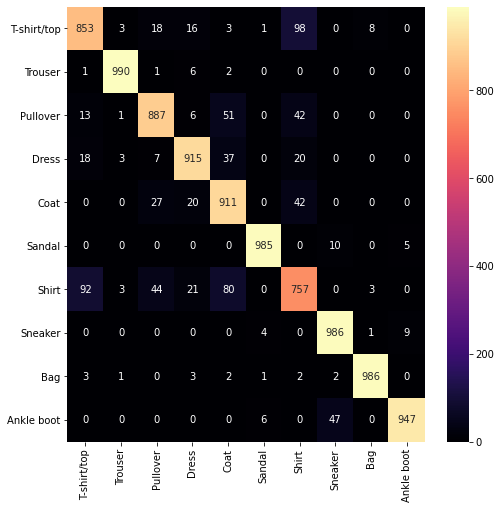

In [ ]:
#Create a confusion matrix with the results from the predictions
print("\nConfusion matrix for the CNN Model:\n")
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix(y_test, cnn_predictions), annot = True, fmt='d', cmap = 'magma',
            xticklabels = target_labels, yticklabels = target_labels)
plt.yticks(rotation = 0) 

In [ ]:
#Classification report
print("Classification report for the CNN Model\n\n", classification_report(y_test, cnn_predictions, target_names = target_labels))

Classification report for the CNN Model

               precision    recall  f1-score   support

 T-shirt/top       0.87      0.85      0.86      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.90      0.89      0.89      1000
       Dress       0.93      0.92      0.92      1000
        Coat       0.84      0.91      0.87      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.79      0.76      0.77      1000
     Sneaker       0.94      0.99      0.96      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Check some predictions of the model

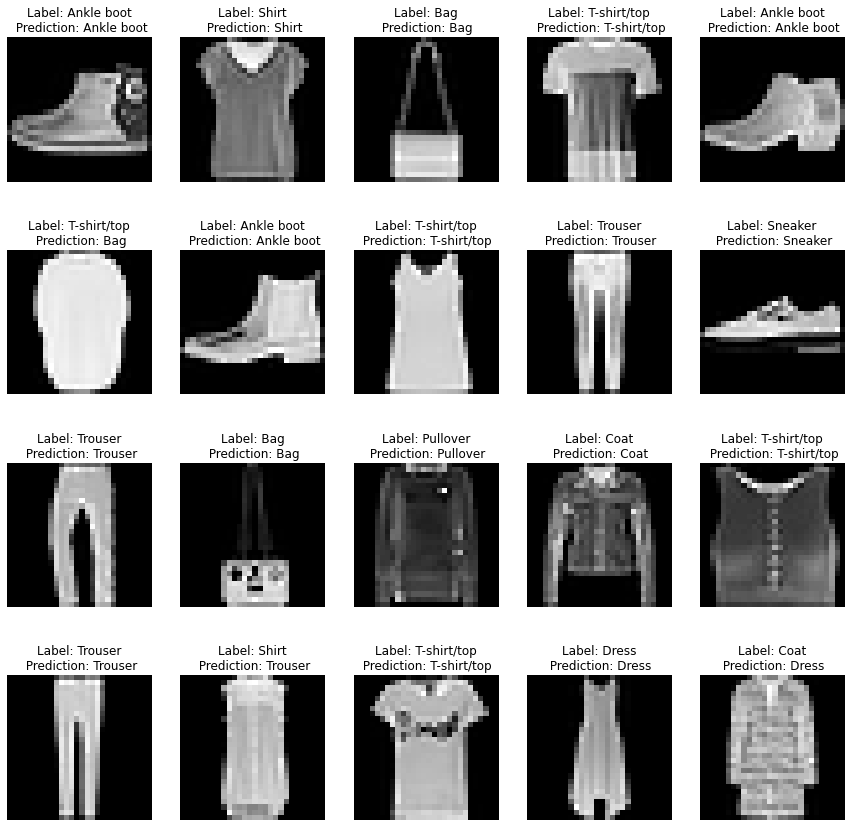

In [ ]:
#Reshape data back to the original shape
X_test = X_test.reshape(X_test.shape[0], 28, 28)

#Display some samples and the prediction for each sample
rows = 4
columns = 5

fig, axes = plt.subplots(rows, columns, figsize=(15,15))
axes = axes.ravel()

random_indexes = np.random.randint(low = 0, high = y_test.shape[0], size = rows*columns)

for index in range(0, rows*columns): 
  axes[index].axis('off')
  axes[index].imshow(X_test[random_indexes[index]], cmap = 'gray')
  axes[index].set_title("Label: {}\n Prediction: {}".format(target_labels[int(y_test[random_indexes[index]])], target_labels[int(cnn_predictions[random_indexes[index]])]))